In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [14]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        self.dt  = t[1] - t[0]
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
    
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
            
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]*0.9
    
    def ReduceSizevelocity(self,factor):
        
        self.RvVector = np.array([self.vVector[0]]) # initial condition
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
        
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector

    def GetRPositionVector(self):
        return self.RrVector
    
    def GetVelocityVector(self):
        return self.vVector
    def GetRVelocityVector(self):
        return self.RvVector
    def GetR(self):
        return self.radius

In [15]:
# Discretization
dt = 0.001
tmax = 30
t = np.arange(0,tmax+dt,dt)

In [16]:
def GetindividualParticle(position, velocity, aceleration, t):

    x0 = position
    v0 = velocity
    a0 = aceleration
        
    p = Particle(x0,v0,a0,t,1.,1.0,1)
        
    return p

In [17]:
Limits = np.array([20.,20.])
position=np.array([-15.,5.])
velocity=np.array([1.,0.])
aceleration=np.array([0.,-9.8])

In [18]:
def RunSimulationP(t,P, Limits):
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        P.CheckWallLimits(Limits)
        P.Evolution(it)

    return P

In [19]:
P = GetindividualParticle(position,velocity,aceleration,t)
P = RunSimulationP(t,P, Limits)


100%|██████████████████████████████████████████████████████████████| 30001/30001 [00:00<00:00, 115702.62it/s]


In [20]:
def ReduceTimeP(t,factor):
    
    P.ReduceSize(factor)
    P.ReduceSizevelocity(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])        
    return np.array(Newt)

In [21]:
redt = ReduceTimeP(t,200)


<IPython.core.display.Javascript object>


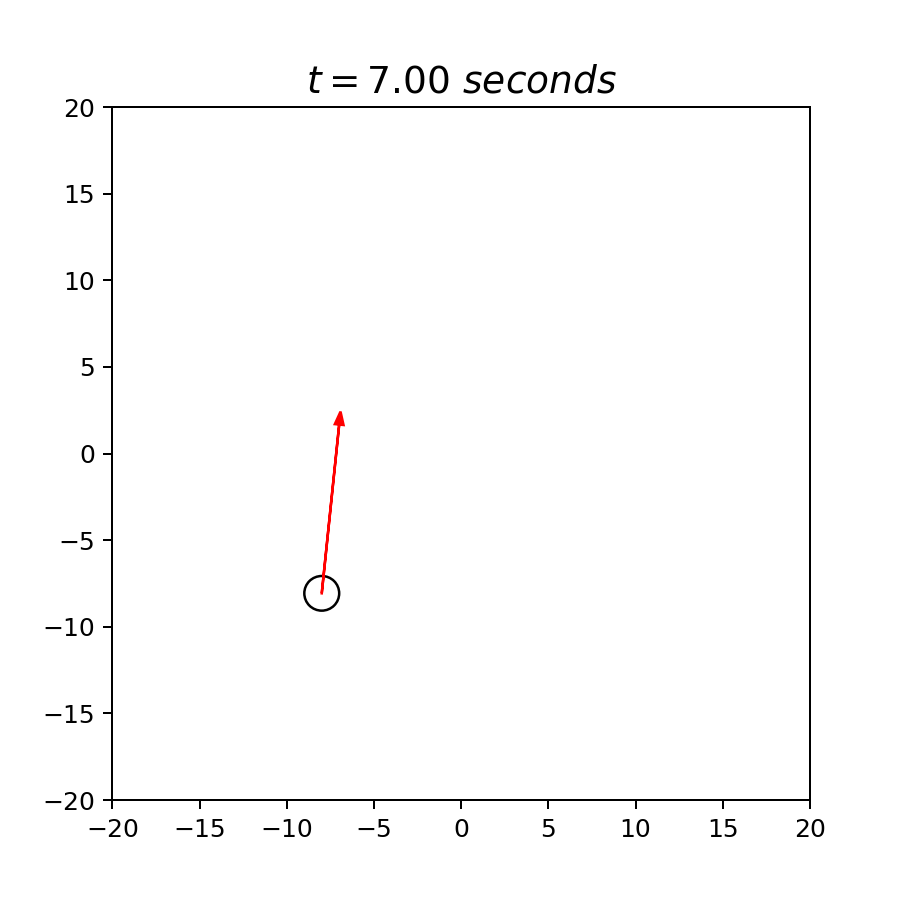

In [22]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    x = P.GetRPositionVector()[i,0]
    y = P.GetRPositionVector()[i,1]
        
    vx = P.GetRVelocityVector()[i,0]
    vy = P.GetRVelocityVector()[i,1]
        
    circle = plt.Circle( (x,y), P.GetR(), color='k', fill=False )
    plot = ax.add_patch(circle)
    plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [33]:
def mechanicEnergy(position, velocity):
    m = P.m
    g = 9.8
        
    total_energy = (m*g*(position[:,1])) + (0.5*m)*(velocity[:,1]**2)
    return total_energy

In [34]:
position = P.GetPositionVector()
velocity = P.GetVelocityVector()
energy = mechanicEnergy(position, velocity)
print(energy)

[  49.           49.00004802   49.00009604 ... -167.08907217 -167.08902415
 -167.08897613]


<IPython.core.display.Javascript object>


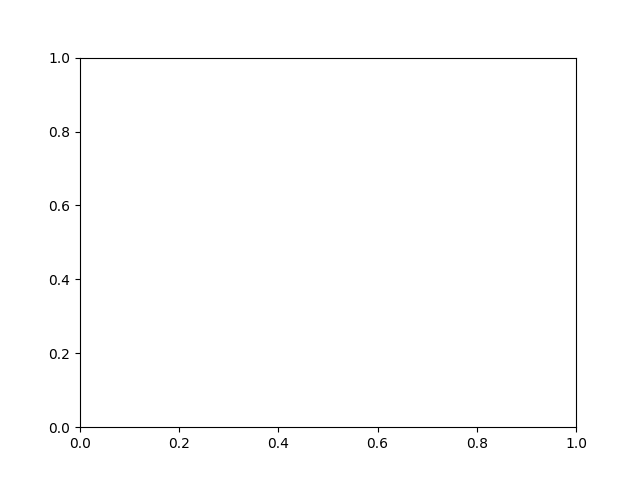

ValueError: x and y must have same first dimension, but have shapes (10001,) and (30001,)

In [36]:
plt.figure()
plt.plot(t, energy)
plt.xlabel("Time (s)")
plt.ylabel("Mechanical Energy (J)")
plt.title("Mechanical Energy vs Time")

plt.show()

In [23]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax+dt,dt)

In [24]:
def GetParticlesG(NParticles,Limit,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

In [25]:
def RunSimulationG(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticlesG(NParticles,Limits[0],Velo = Velo, Dim=3,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles

In [26]:
Gas_Particles= RunSimulationG(t)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 10001/10001 [00:18<00:00, 543.05it/s]


In [19]:
def ReduceTime(t,factor):
    
    for p in Gas_Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


<IPython.core.display.Javascript object>


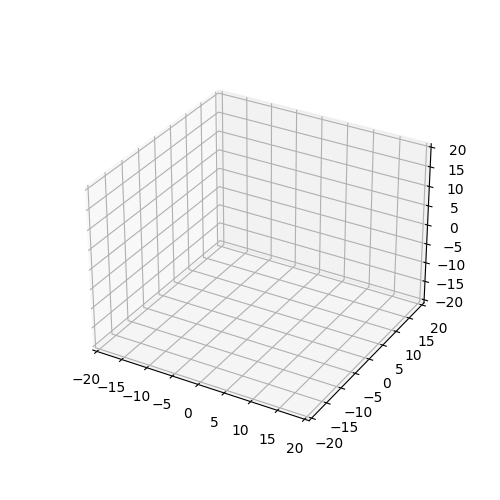

In [30]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init_2():
    ax = plt.axes(projection='3d')
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_zlim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init_2()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    print("Hola")
    #for p in Gas_Particles:
        
        #x =p.GetRPositionVector()[i,0]
        #y = p.GetRPositionVector()[i,1]
        #z = p.GetRPositionVector()[i,2]
        #print(x)

        #plot=ax.scatter(x,y,z)
    
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init_2)
